In [3]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 1.7 MB/s eta 0:01:01
                                              0.1/99.8 MB 2.3 MB/s eta 0:00:44
                                              0.2/99.8 MB 1.6 MB/s eta 0:01:04
                                              0.2/99.8 MB 1.5 MB/s eta 0:01:06
                                              0.3/99.8 MB 1.5 MB/s eta 0:01:08
                                              0.3/99.8 MB 1.4 MB/s eta 0:01:14
                                              0.4/99.8 MB 1.3 MB/s eta 0:01:18
                                              0.4/99.8 MB 1.3 MB/s eta 0:01:18
                                              0.4/99.8 MB 1.0 MB/s eta 0:01:38
                                              0.5/99.8 MB 1.1 MB/s eta 0:01:31
                                              0.5/99.8 MB 1.0 MB/s eta 0:01:38
                                             0.5/99.8 MB 99

In [ ]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings removal
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.feature_selection import RFE,SelectKBest,SelectFromModel
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Preprocessing

In [6]:
# defining dataframes
train_df = pd.read_csv(r"C:\Users\Faizan\Desktop\DM_PROJ\archive\Blood_samples_dataset_balanced_2(f).csv")
test_df = pd.read_csv(r"C:\Users\Faizan\Desktop\DM_PROJ\archive\blood_samples_dataset_test.csv")

In [65]:
train_df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [66]:
test_df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [64]:
# checking train_df
train_df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [8]:
print('train shape:',train_df.shape)
print('test shape: ',test_df.shape)

train shape: (2351, 25)
test shape:  (486, 25)


In [9]:
train_df.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [10]:
# Are there any missing values?
print('train_df missing values: ',train_df.isna().sum().sum())
print('test_df missing values: ',test_df.isna().sum().sum())

train_df missing values:  0
test_df missing values:  0


In [11]:
# Unique variables in the target column of the training set.
print('-------train set-------')
print(f'Unique variables in the target column: {train_df.Disease.unique()}\nthe number of unique variables in the target column: {train_df.Disease.nunique()}\n')
# Unique variables in the target column of the test set.
print('-------test set-------')
print(f'Unique variables in the target column: {test_df.Disease.unique()}\nthe number of unique variables in the target column: {test_df.Disease.nunique()}')


-------train set-------
Unique variables in the target column: ['Healthy' 'Diabetes' 'Thalasse' 'Anemia' 'Thromboc']
the number of unique variables in the target column: 5

-------test set-------
Unique variables in the target column: ['Thalasse' 'Diabetes' 'Heart Di' 'Anemia' 'Thromboc' 'Healthy']
the number of unique variables in the target column: 6


In [12]:
# Let's combine 2 data frames.
data = pd.concat([train_df,test_df],ignore_index=True)

In [13]:
# let's check our new data frame.
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [14]:
data.shape # (rows, columns)

(2837, 25)

In [15]:
# Let's find out how many of each class there
data.Disease.value_counts()

Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: Disease, dtype: int64

In [16]:
# Let's convert our target column to numeric values.
data.Disease = data.Disease.astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data.Disease = data.Disease.cat.codes.values
data.Disease

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

Text(0.5, 1.0, 'Correlation Heatmap')

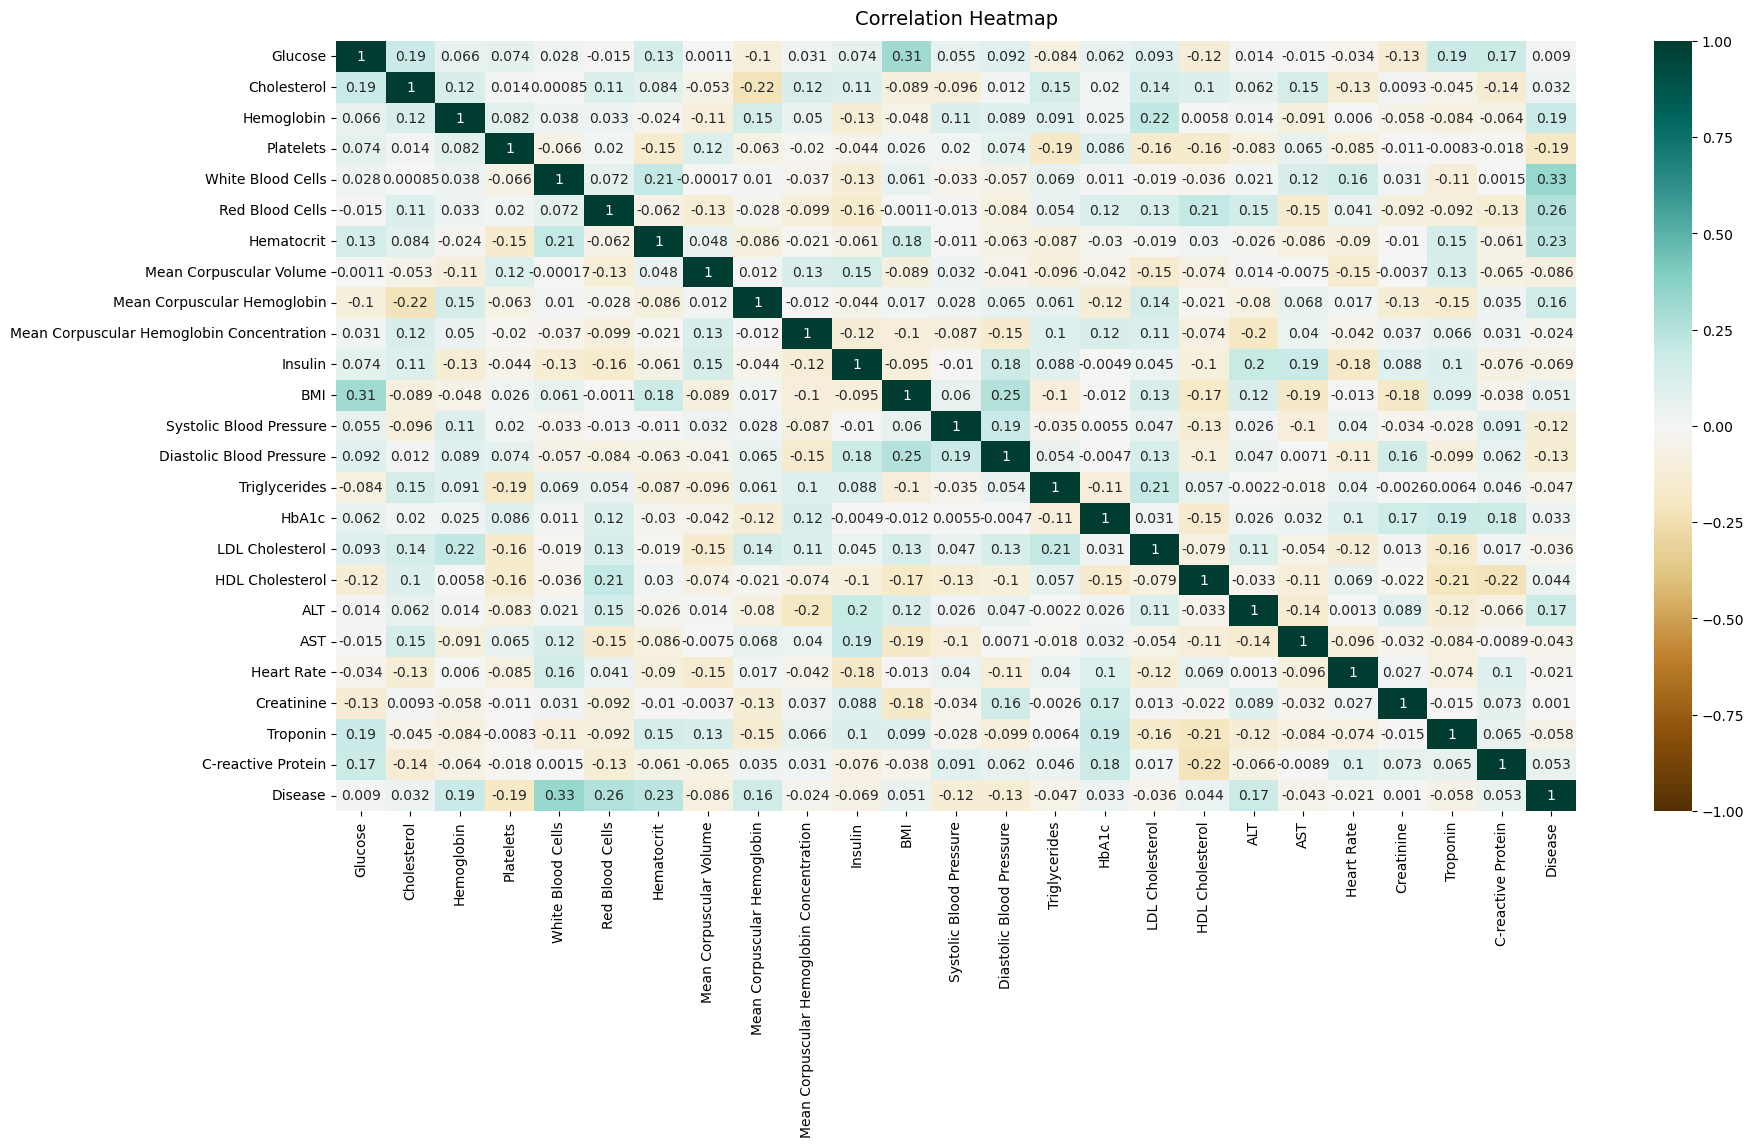

In [17]:
# Make a correlation matrix
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

2: Healty  
1: Diabetes
4: Thalasse  
0: Anemia  
5: Thromboc  
3: Heart Di

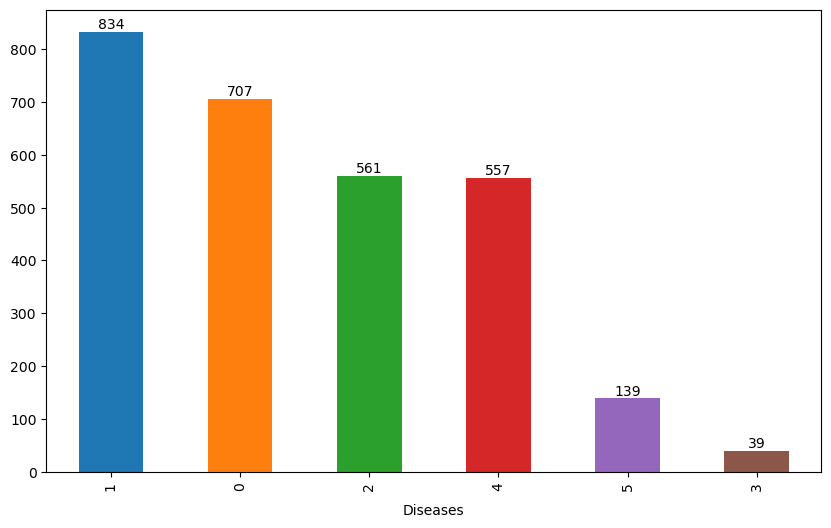

In [18]:
# Let's find how many of each class there are in the bar chart.
counts = data[data.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10,6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('Diseases',labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

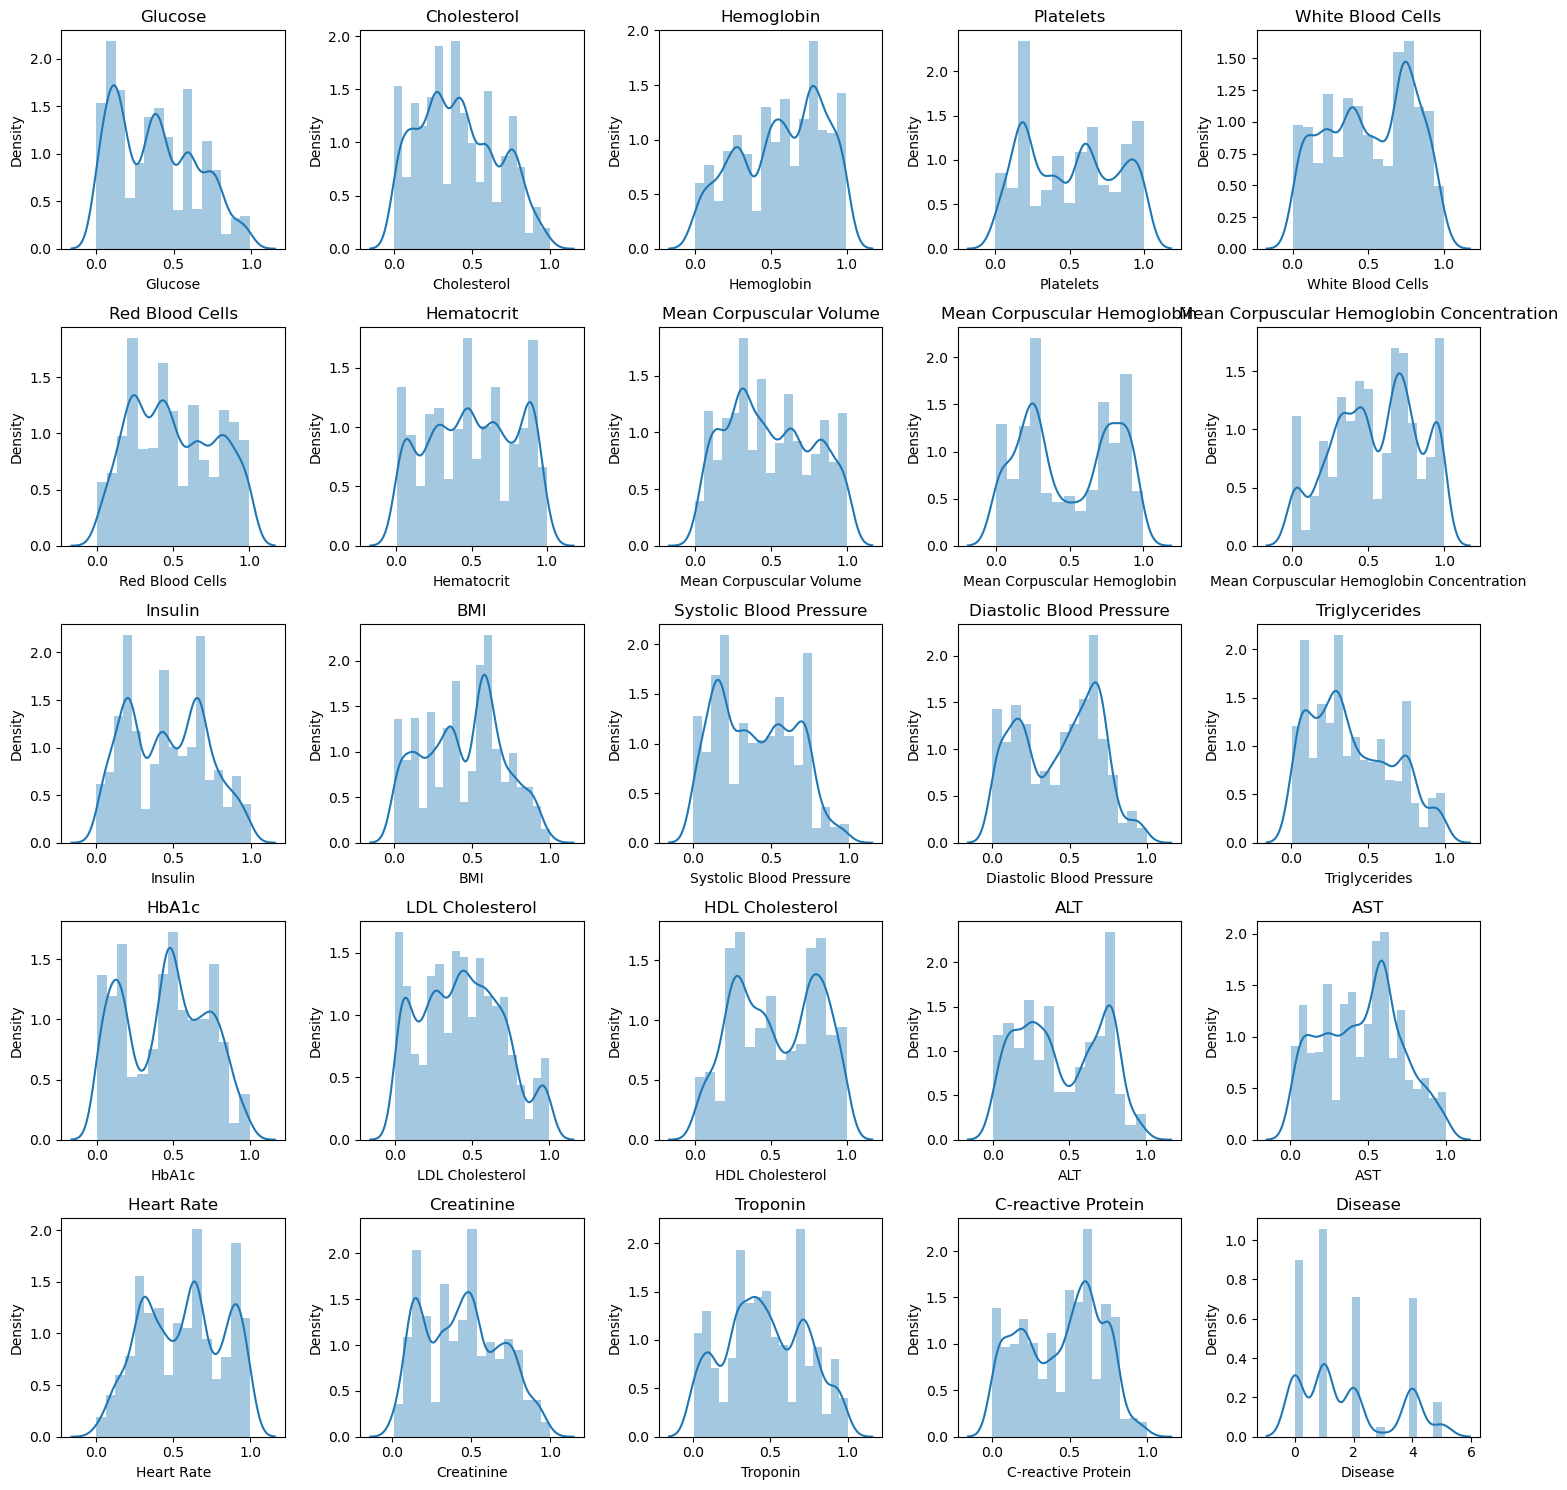

In [19]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

# Draw a distplot for each column and add it to the subplot
for i, col in enumerate(data.columns):
    sns.distplot(data[col], ax=axs[i//5, i%5])
    axs[i//5, i%5].set_title(col)

# Hide missing subplots
for i in range(len(data.columns), 25):
    axs[i//5, i%5].axis('off')

#  Show charts
plt.tight_layout()
plt.show()

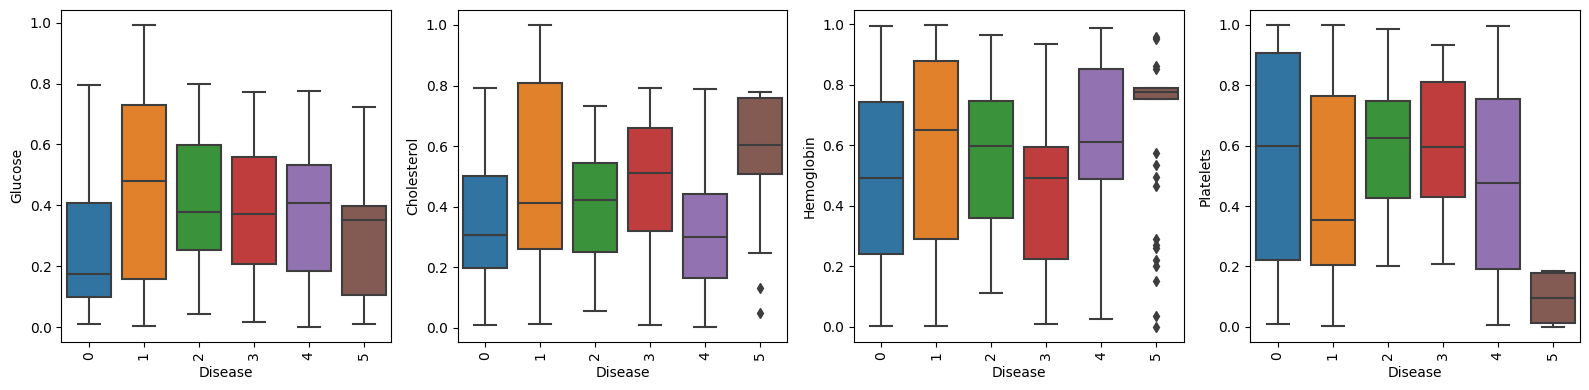

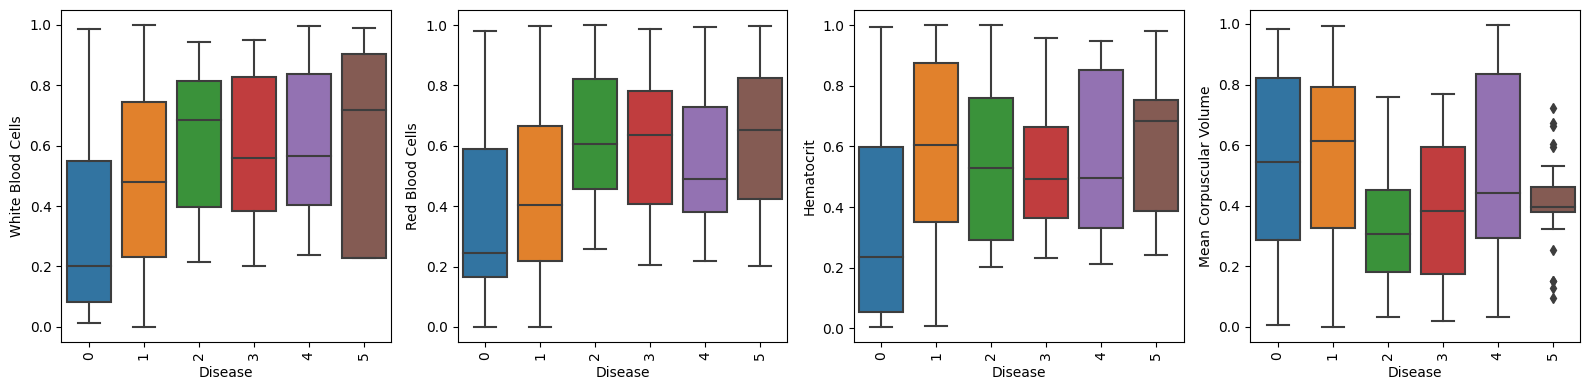

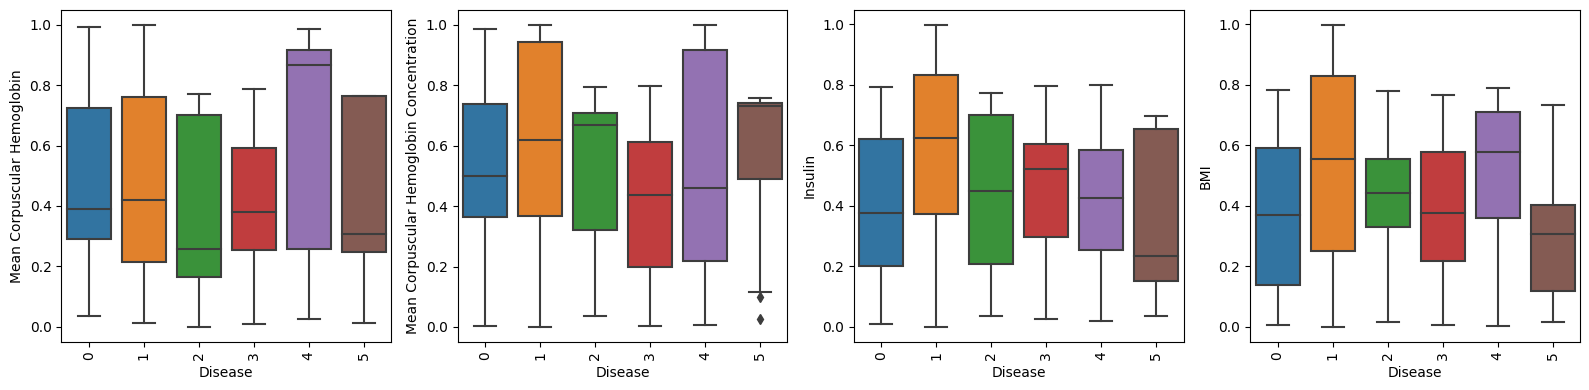

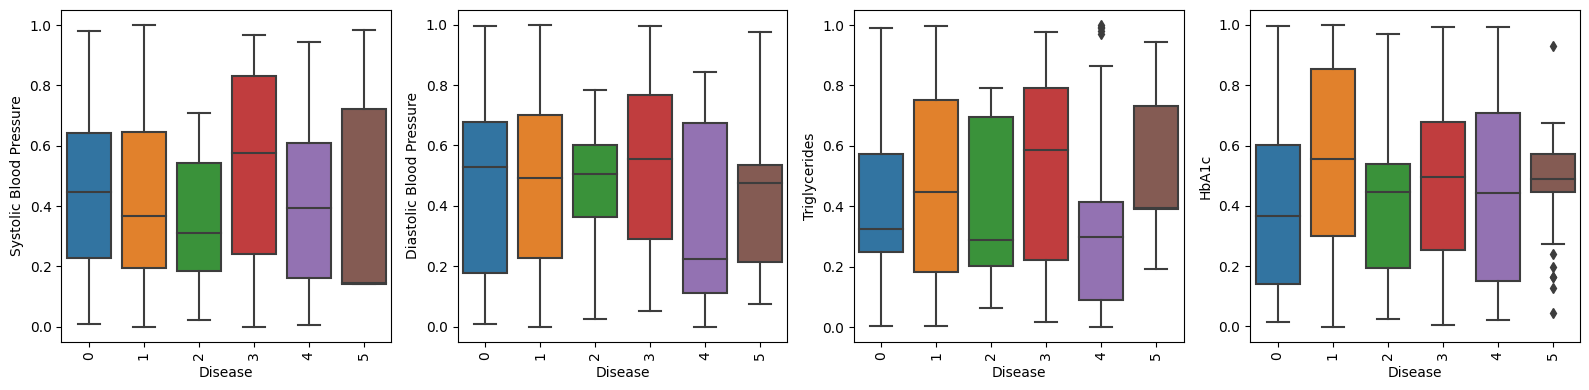

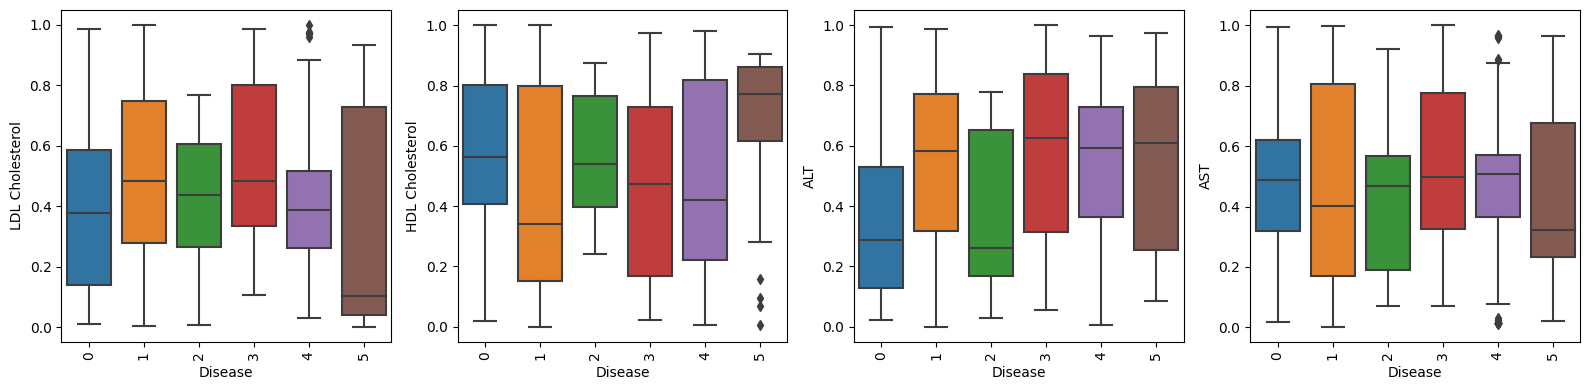

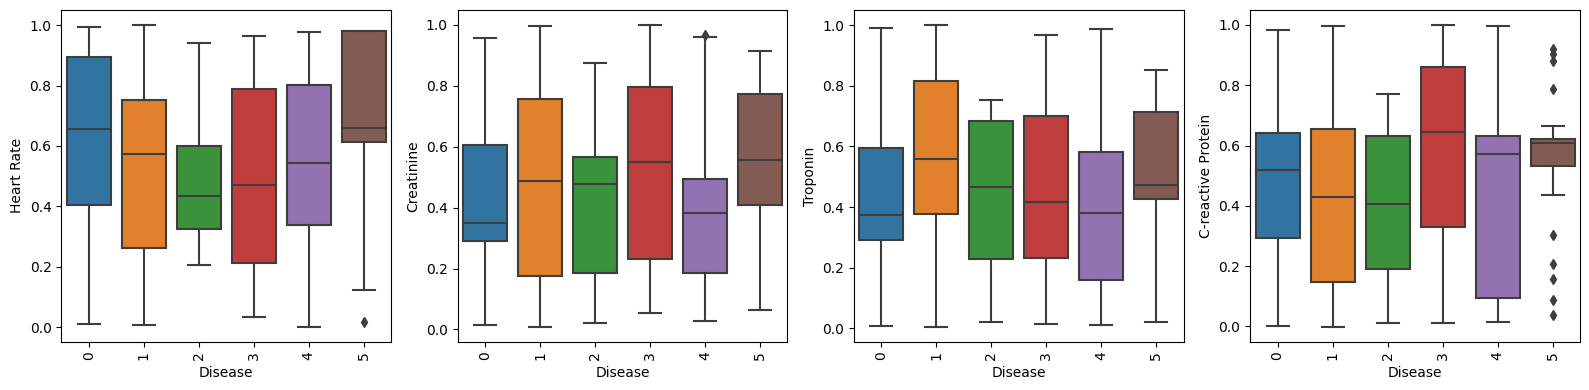

In [17]:
# Draw a boxplot for each column
index = 0
for i in range(0, len(data.columns) - 1, 4):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for j, ax in enumerate(axes.flat):
        if index < len(data.columns) - 1:
            sns.boxplot(data=data, x=data.columns[-1], y=data.columns[index], ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            index += 1
    plt.tight_layout()
    plt.show()

In [21]:
data['Hemoglobin'].describe()

count    2837.000000
mean        0.568941
std         0.278908
min         0.000719
25%         0.325035
50%         0.597916
75%         0.791215
max         0.997876
Name: Hemoglobin, dtype: float64

In [22]:
X = data.drop('Disease',axis=1)
y = data['Disease']

In [23]:
X

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


In [24]:
y

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

# ANN

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10,stratify= y)

In [27]:
results = pd.DataFrame([],columns=['Accuracy','train Accuracy'])

In [28]:
print('train shape:',X_train.shape)
print('test shape: ',X_test.shape)

train shape: (2269, 24)
test shape:  (568, 24)


In [31]:
# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create ann model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(64,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add( tf.keras.layers.Dense(6, activation='softmax'))

In [32]:
# let's compile our model.
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
# Let's add an early stop command.
early_stopping = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

In [34]:
# model fit
history = ann.fit(X_train_scaled, y_train, epochs=100,
                    validation_split=0.1, callbacks=[early_stopping], verbose=2)

Epoch 1/100
64/64 - 1s - loss: 1.0492 - accuracy: 0.6180 - val_loss: 0.4222 - val_accuracy: 0.9295 - 1s/epoch - 18ms/step
Epoch 2/100
64/64 - 0s - loss: 0.4316 - accuracy: 0.8874 - val_loss: 0.2356 - val_accuracy: 0.9383 - 142ms/epoch - 2ms/step
Epoch 3/100
64/64 - 0s - loss: 0.2761 - accuracy: 0.9280 - val_loss: 0.2017 - val_accuracy: 0.9515 - 134ms/epoch - 2ms/step
Epoch 4/100
64/64 - 0s - loss: 0.2258 - accuracy: 0.9349 - val_loss: 0.1840 - val_accuracy: 0.9339 - 132ms/epoch - 2ms/step
Epoch 5/100
64/64 - 0s - loss: 0.1780 - accuracy: 0.9486 - val_loss: 0.1812 - val_accuracy: 0.9339 - 131ms/epoch - 2ms/step
Epoch 6/100
64/64 - 0s - loss: 0.1574 - accuracy: 0.9510 - val_loss: 0.1435 - val_accuracy: 0.9559 - 137ms/epoch - 2ms/step
Epoch 7/100
64/64 - 0s - loss: 0.1185 - accuracy: 0.9598 - val_loss: 0.1603 - val_accuracy: 0.9515 - 132ms/epoch - 2ms/step
Epoch 8/100
64/64 - 0s - loss: 0.0994 - accuracy: 0.9672 - val_loss: 0.1575 - val_accuracy: 0.9427 - 132ms/epoch - 2ms/step
Epoch 9/10

In [35]:
print('test set',ann.evaluate(X_test_scaled,y_test)) # test set result
print('train set',ann.evaluate(X_train_scaled,y_train)) # train set result

18/18 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9331
test set [0.2175285518169403, 0.9330986142158508]
71/71 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9727
train set [0.08406496793031693, 0.9726752042770386]


In [36]:
ann_acc = ann.evaluate(X_test_scaled,y_test)
train_accuracy = ann.evaluate(X_train_scaled,y_train)
results.loc['ANN Model'] = [ann_acc,train_accuracy]

71/71 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9727


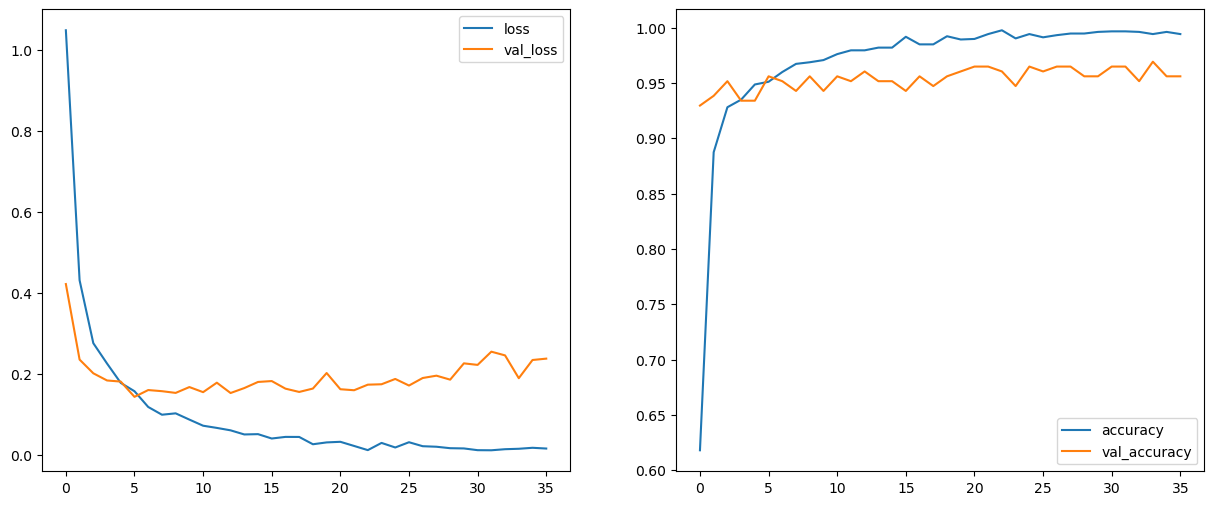

In [38]:
#  Let's plot the training set and validation set losses on a graph.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='best')


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# All score DataFrame
results = pd.DataFrame([],columns=['Accuracy Score','Train Accuracy'])

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix,ConfusionMatrixDisplay

In [44]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create model
model = GradientBoostingClassifier(ccp_alpha=0.001, learning_rate=0.01,
                            n_estimators=500, random_state=10)
# Model fit
model.fit(X_train_scaled,y_train)
# model predict
y_pred = model.predict(X_test_scaled)
acc= accuracy_score(y_test,y_pred)

print('GradientBoostingClassifier accuracy is:',acc)


GradientBoostingClassifier accuracy is: 0.9577464788732394


In [45]:
# train set predict
y_train_pred = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train,y_train_pred)
print('train set accuracy is:',train_acc)


results.loc['GradientBoostingClassifier'] = [acc,train_acc]

train set accuracy is: 0.9731159100925518


In [46]:
!pip install pydotplus

                                              0.0/278.7 kB ? eta -:--:--
     ------------------------------------- 278.7/278.7 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=a69c72b52e511f0e8821226174f3ed1439d4cd0b750c1a166023a44449b32931
  Stored in directory: c:\users\faizan\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [48]:
# auc score of the multiclass model.
y_proba =np.array(model.predict_proba(X_test_scaled))
score = roc_auc_score(y_test,y_proba,multi_class='ovr',average='macro')
print('auc score of the multiclass model is:',score)

auc score of the multiclass model is: 0.99580599897078


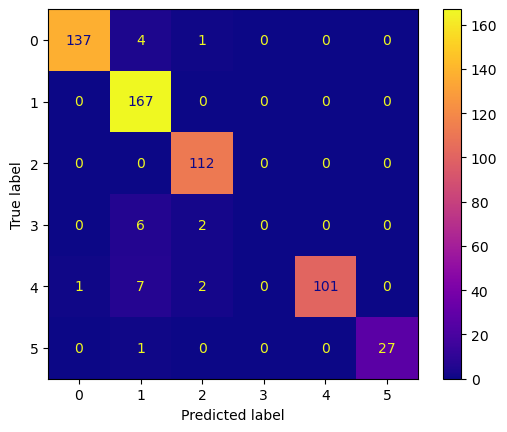

In [49]:
# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),
                              display_labels=model.classes_)
disp.plot(cmap='plasma')

plt.show()

# DecisionTreeClassifier

In [50]:
mdl = DecisionTreeClassifier()

path= mdl.cost_complexity_pruning_path(X_train,y_train)
path['ccp_alphas']

array([0.        , 0.00044072, 0.00044072, 0.00044072, 0.00058763,
       0.00058763, 0.00058763, 0.00077126, 0.00078351, 0.0007933 ,
       0.0007933 , 0.0008539 , 0.00085474, 0.00086588, 0.00086898,
       0.00087313, 0.00087537, 0.00087581, 0.00087726, 0.00088145,
       0.00100567, 0.00105773, 0.00106234, 0.00107977, 0.00110181,
       0.00113329, 0.00120791, 0.00125436, 0.00125606, 0.00125921,
       0.00131167, 0.00141091, 0.00151105, 0.00164537, 0.00173851,
       0.00195244, 0.00196798, 0.00201187, 0.00210224, 0.00247818,
       0.00255512, 0.00259468, 0.00261621, 0.00305877, 0.00361549,
       0.00453789, 0.00474187, 0.00504565, 0.00589325, 0.00630737,
       0.00705207, 0.00722858, 0.00794026, 0.01063061, 0.01141317,
       0.01161575, 0.01279897, 0.01663738, 0.01690359, 0.01738795,
       0.01774828, 0.02231182, 0.02241917, 0.02731697, 0.03154103,
       0.03405757, 0.03817191, 0.05442068, 0.05642132, 0.06872152])

In [52]:
# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
mdl = DecisionTreeClassifier(random_state=2,max_features=18,ccp_alpha=0.002478180717510433)
# model fit
mdl.fit(X_train_scaled,y_train)
# test set predict
y_pred = mdl.predict(X_test_scaled)
# train set predict
y_tpred = mdl.predict(X_train_scaled)

train_score = accuracy_score(y_train,y_tpred)
score = accuracy_score(y_test,y_pred)
print('DecisionTreeClassifier accuracy is:',score)
print('DecisionTreeClassifier train accuracy is:',train_score)

results.loc['DecisionTreeClassifier'] = [score,train_score]

DecisionTreeClassifier accuracy is: 0.9383802816901409
DecisionTreeClassifier train accuracy is: 0.9673865138827678


# XGBClassifier

In [55]:
from xgboost import XGBClassifier

In [56]:
# xgbc = XGBClassifier()

# pipe = Pipeline([('scaler',StandardScaler()),('boost',xgbc)])

# params = [{'boost':[XGBClassifier(objective='softmax',eval_metric='merror')],
#            'boost__max_depth': np.arange(3,10),
#            'boost__learning_rate':[0.001,0.01,0.1,0.2],
#            'boost__subsample': [0.5,1],
#            'boost__n_estimators':[100,300,500,1000]}]

# clf = GridSearchCV(pipe,params,
#                    cv=StratifiedKFold(n_splits=3,shuffle=True,random_state=1),
#                    scoring='accuracy',verbose=2,n_jobs=-1)

# best_model = clf.fit(X_train,y_train)
# best_model.best_estimator_.get_params()

In [57]:
# standardization
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train)
X_test_reduced = scaler.transform(X_test)
# create model
boost = XGBClassifier(n_estimators=1000, max_depth=9, learning_rate=0.01,
                       subsample=1,objective='multi:softprob')
# model fit
boost.fit(X_train_reduced,y_train)
# test set predict
y_pred = boost.predict(X_test_reduced)
# train set predict
train_pred = boost.predict(X_train_reduced)

xgb_train = accuracy_score(y_train,train_pred)
xgb_acc = accuracy_score(y_test,y_pred)

results.loc['XGBOOXGBClassifier'] = [xgb_acc,xgb_train]

print('XGBOOXGBClassifier accuracy is:',xgb_acc)

XGBOOXGBClassifier accuracy is: 0.9876760563380281


# Logistic Regression

In [61]:
# standardization
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train)
X_test_reduced = scaler.transform(X_test)

# Create model
logmodel = LogisticRegression(max_iter= 1000, solver = 'saga', penalty= 'l1',
                              random_state = 10, C = 1.0, multi_class = 'multinomial')
# model fit
logmodel.fit(X_train_reduced,y_train)
# test set predict
y_pred = logmodel.predict(X_test_reduced)
# train set predict
train_pred = logmodel.predict(X_train_reduced)

logmodel_train = accuracy_score(y_train,train_pred)
logmodel_acc = accuracy_score(y_test,y_pred)

results.loc['LogisticRegression'] = [logmodel_acc,logmodel_train]

print('LogisticRegression accuracy is:',logmodel_acc)


LogisticRegression accuracy is: 0.8785211267605634


In [62]:
results

,Accuracy Score,Train Accuracy
GradientBoostingClassifier,0.957746,0.973116
DecisionTreeClassifier,0.938380,0.967387
XGBOOXGBClassifier,0.987676,1.000000
LogisticRegression,0.878521,0.878801


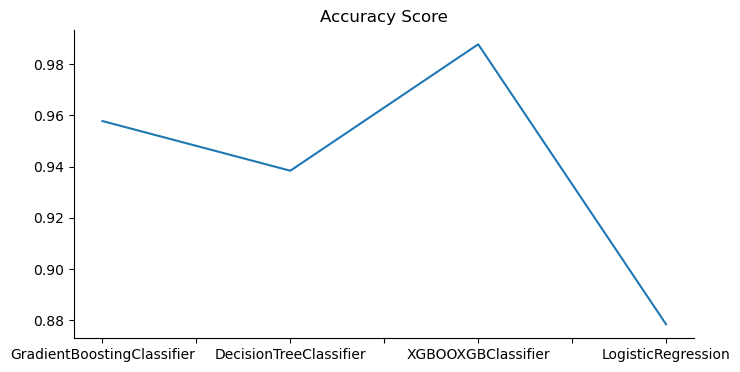

In [63]:
# Accuracy Score
from matplotlib import pyplot as plt
results['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Let's combine 2 data frames.
data = pd.concat([train_df, test_df], ignore_index=True)

# Let's convert our target column to numeric values.
data['Disease'] = data['Disease'].astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data['Disease'] = data['Disease'].cat.codes.values

# Separate features (X) and target variable (y)
X = data.drop(columns=['Disease'])  # Features
y = data['Disease']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9577464788732394


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

data = pd.concat([train_df, test_df], ignore_index=True)

data['Disease'] = data['Disease'].astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data['Disease'] = data['Disease'].cat.codes.values

X = data.drop(columns=['Disease'])  # Features
y = data['Disease']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

boost = XGBClassifier(n_estimators=1000, max_depth=9, learning_rate=0.01,
                       subsample=1, objective='multi:softprob')

boost.fit(X_scaled, y)

disease_labels = {v: k for k, v in d.items()}  # Reverse the mapping

input_values = {}
for feature in X.columns:
    value = input("Enter value for {}: ".format(feature))
    input_values[feature] = float(value)

input_df = pd.DataFrame([input_values])
input_scaled = scaler.transform(input_df)

predicted_disease_code = boost.predict(input_scaled)[0]

predicted_disease_label = d[predicted_disease_code]

print("Most Probable Disease:", predicted_disease_label)

Enter value for Glucose:  0.001827
Enter value for Cholesterol:  0.033693
Enter value for Hemoglobin:  0.114755
Enter value for Platelets:  0.97927
Enter value for White Blood Cells:  0.562604
Enter value for Red Blood Cells:  0.866499
Enter value for Hematocrit:  0.578042
Enter value for Mean Corpuscular Volume:  0.914615
Enter value for Mean Corpuscular Hemoglobin:  0.026864
Enter value for Mean Corpuscular Hemoglobin Concentration:  0.038641
Enter value for Insulin:  0.645755
Enter value for BMI:  0.070888
Enter value for Systolic Blood Pressure:  0.616684
Enter value for Diastolic Blood Pressure:  0.970168
Enter value for Triglycerides:  0.65323
Enter value for HbA1c:  0.186104
Enter value for LDL Cholesterol:  0.430398
Enter value for HDL Cholesterol:  0.016678
Enter value for ALT:  0.885352
Enter value for AST:  0.652733
Enter value for Heart Rate:  0.652733
Enter value for Creatinine:  0
Enter value for Troponin:  0
Enter value for C-reactive Protein:  0


Most Probable Disease: Thalasse
